In [16]:
import os
import numpy as np 
import pandas as pd
import glob


log_file_dir = "./simulation"
method_seq = glob.glob("{}/mae-sr.csv".format(log_file_dir))

method_seq = [os.path.split(method)[1].split('.')[0] for method in method_seq]

print(method_seq)

summarize_log=pd.DataFrame([])

for method in method_seq:
    
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    
    
    log.columns = "model,iteration,dim,n,ratio,trainingtime,testtime,roc_auc,mae,n_estimators,srmaeratio".split(',')
    log["method"]=method
    summarize_log=summarize_log.append(log)
    
    


['mae-sr']


In [17]:
filter_columns = ["method", "dim", "ratio", "n", "n_estimators"]
unique_values_dict = {col: summarize_log[col].unique().tolist() for col in filter_columns}
unique_values_dict

values_to_filter = {
    # "method": ['NNDAD-B', 'NNDAD-S'],
    # "dim": [1],
    "ratio": [0.1],
    # 'n': [1000, 5000, 10000, 20000],
}
mask_list = [summarize_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = summarize_log[combined_mask]

In [18]:
mean_df = filtered_log.groupby(by=["method", "dim", "ratio", "n", "n_estimators"]).agg('mean').reset_index()
mean_df

,method,dim,ratio,n,n_estimators,iteration,trainingtime,testtime,roc_auc,mae,srmaeratio
0,mae-sr,1,0.1,300,1,9.5,0.281607,0.022687,0.988531,1.176612e+00,2.400409e-01
1,mae-sr,1,0.1,1000,1,9.5,0.383640,0.130897,0.991781,1.208289e+00,1.669344e-01
2,mae-sr,1,0.1,3000,1,9.5,1.960345,1.059039,0.996274,1.255801e+00,1.194337e-01
3,mae-sr,1,0.1,5000,1,9.5,3.785076,2.911999,0.997650,1.250870e+00,1.044483e-01
4,mae-sr,1,0.1,10000,1,9.5,12.728795,11.970731,0.998608,1.251770e+00,8.647153e-02
5,mae-sr,2,0.1,300,1,9.5,0.194447,0.023711,0.967944,8.990715e+00,3.729908e-02
6,mae-sr,2,0.1,1000,1,9.5,0.270334,0.139026,0.982026,9.101943e+00,2.805537e-02
7,mae-sr,2,0.1,3000,1,9.5,1.324844,1.125077,0.989370,9.252555e+00,2.189100e-02
8,mae-sr,2,0.1,5000,1,9.5,3.696516,3.117178,0.991786,9.274963e+00,1.963450e-02
9,mae-sr,2,0.1,10000,1,9.5,13.262007,12.900753,0.994248,9.401396e+00,1.681219e-02


In [19]:
adjusted_mean_df = mean_df
adjusted_mean_df["logsrmaeratio"] = np.log(mean_df["srmaeratio"] * np.log(mean_df["n"]))
adjusted_mean_df

,method,dim,ratio,n,n_estimators,iteration,trainingtime,testtime,roc_auc,mae,srmaeratio,logsrmaeratio
0,mae-sr,1,0.1,300,1,9.5,0.281607,0.022687,0.988531,1.176612e+00,2.400409e-01,0.314184
1,mae-sr,1,0.1,1000,1,9.5,0.383640,0.130897,0.991781,1.208289e+00,1.669344e-01,0.142490
2,mae-sr,1,0.1,3000,1,9.5,1.960345,1.059039,0.996274,1.255801e+00,1.194337e-01,-0.044757
3,mae-sr,1,0.1,5000,1,9.5,3.785076,2.911999,0.997650,1.250870e+00,1.044483e-01,-0.116976
4,mae-sr,1,0.1,10000,1,9.5,12.728795,11.970731,0.998608,1.251770e+00,8.647153e-02,-0.227613
5,mae-sr,2,0.1,300,1,9.5,0.194447,0.023711,0.967944,8.990715e+00,3.729908e-02,-1.547657
6,mae-sr,2,0.1,1000,1,9.5,0.270334,0.139026,0.982026,9.101943e+00,2.805537e-02,-1.640931
7,mae-sr,2,0.1,3000,1,9.5,1.324844,1.125077,0.989370,9.252555e+00,2.189100e-02,-1.741443
8,mae-sr,2,0.1,5000,1,9.5,3.696516,3.117178,0.991786,9.274963e+00,1.963450e-02,-1.788380
9,mae-sr,2,0.1,10000,1,9.5,13.262007,12.900753,0.994248,9.401396e+00,1.681219e-02,-1.865324


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (5).

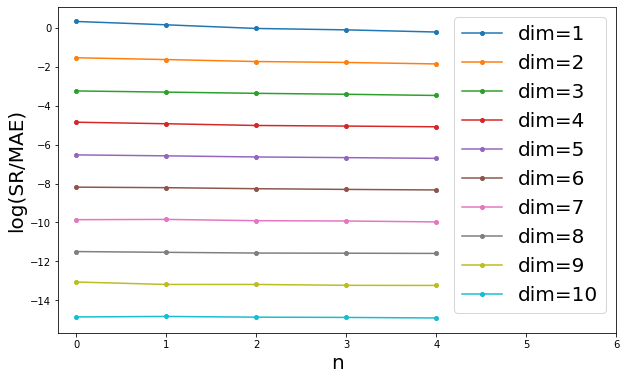

In [49]:
import matplotlib.pyplot as plt

# large plot
fig, ax = plt.subplots(figsize=(10, 6))
for d in adjusted_mean_df["dim"].unique():
    dim_df = adjusted_mean_df[adjusted_mean_df["dim"] == d]
    _ = ax.plot([0,1,2,3,4], dim_df["logsrmaeratio"], label="dim={}".format(d), marker='o', markersize=4)
_ = ax.legend(fontsize=20)

_ = ax.set_xlabel("n", fontsize=20)
_ = ax.set_ylabel("log(SR/MAE)", fontsize=20)
# _ = ax.grid(axis='x', linestyle='--')
# ticks on x
_ = ax.set_xticks([0,1,2,3,4, 5, 6],adjusted_mean_df["n"].unique(), fontsize=20)
_ = ax.set_yticks([0,-4,-8,-12, ], fontsize = 20)